In [1]:
import torch
import numpy as np
import imageio
from einops import rearrange
import random

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [2]:
import menrva.data.ImagePatchDataset as ipd
import menrva.models.ArtGAN as ag

In [3]:
rr = imageio.imread('/data/ag_imgs/tests/cat.png')
rr = torch.tensor(rr).float()
rr = rr/255.0
rr = 2*(rr-rr.min())/(rr.max()-rr.min())-1
rr = rr.unfold(0,128,100).unfold(1,128,100).reshape(-1,3,128,128)
rr = rearrange(rr,'b c h w -> b h w c')

In [4]:
import matplotlib.pyplot as plt
def unnormalize_image(x):
    return (x-x.min())/(x.max()-x.min())

In [5]:
rr.shape

torch.Size([55, 128, 128, 3])

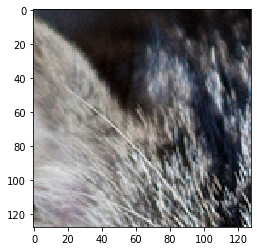

In [6]:
plt.imshow(unnormalize_image(rr[15]))

In [13]:
mdata = torch.load('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/model_weights_564_0.pkl')

In [14]:
mdata['log'].logs.keys()

dict_keys(['D/loss_real', 'D/loss_fake', 'D/loss_gp', 'G/loss_fake'])

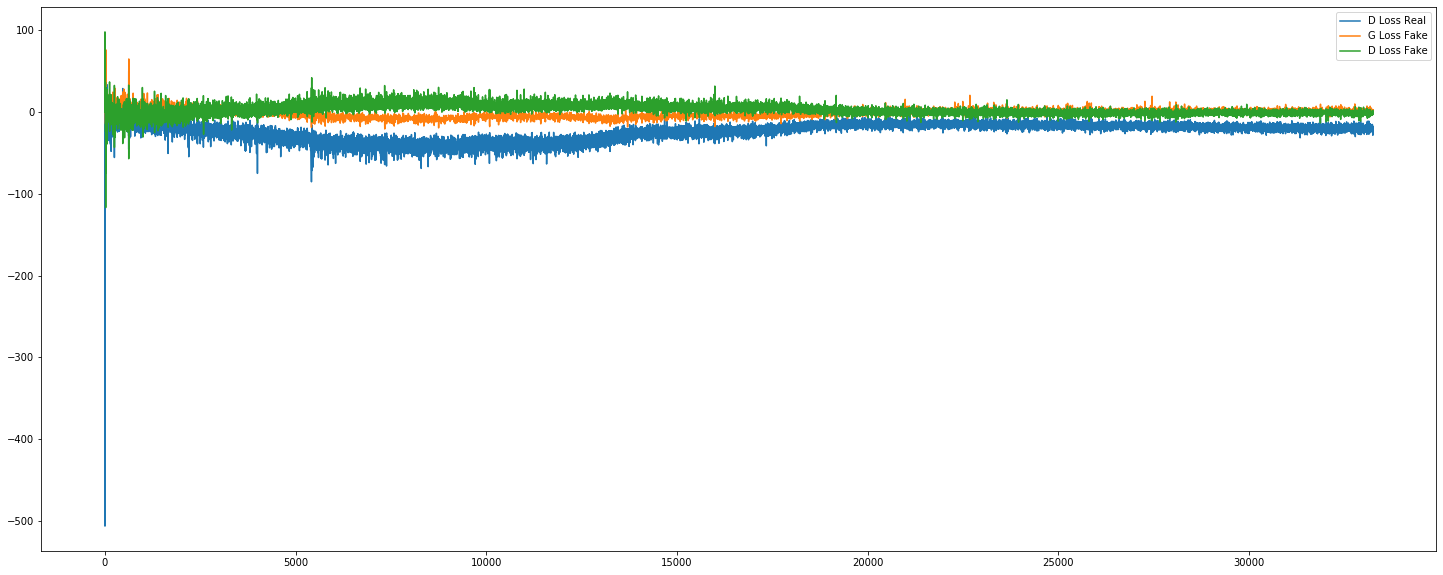

In [15]:
DLr = mdata['log']['D/loss_real']
DLf = mdata['log']['D/loss_fake']
GLf = mdata['log']['G/loss_fake']

plt.figure(figsize=(25,10))
plt.plot(DLr,label='D Loss Real')
plt.plot(GLf,label='G Loss Fake')
plt.plot(DLf,label='D Loss Fake')
plt.legend()
plt.show()

In [89]:
pgs = ag.PatchGANSolver2.load('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/model_weights_890_61.pkl',None)

In [103]:
sample = pgs.G(rr[15].unsqueeze(0))

In [96]:
ss = sample

In [110]:
ssimg = unnormalize_image(ss.detach().numpy())[0]
ssimg = ssimg*255
ssimg = ssimg.astype(np.uint8)

In [112]:
ssimg.shape

(128, 128, 3)

In [113]:
imageio.imwrite('pinkbrain.png',ssimg)

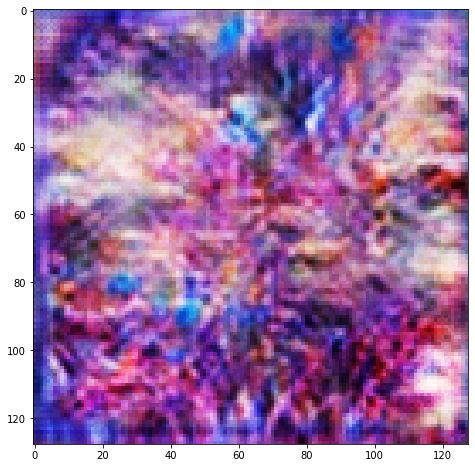

In [105]:
plt.figure(figsize=(8,8))
plt.imshow(unnormalize_image(ss.detach().numpy())[0])

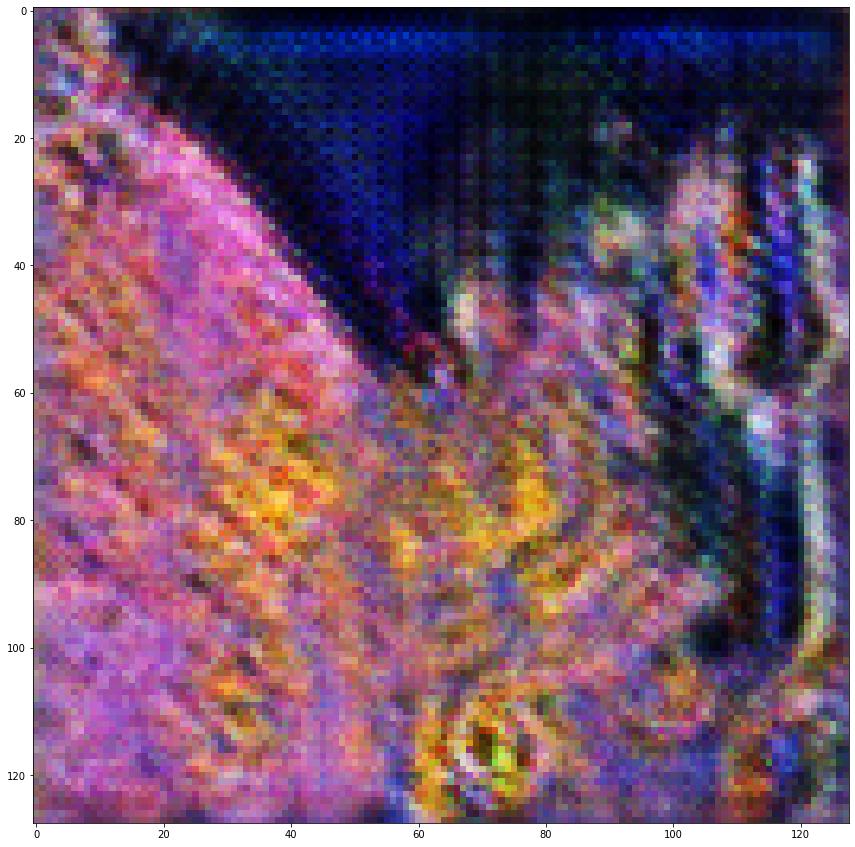

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(unnormalize_image(sample.detach().numpy())[0])

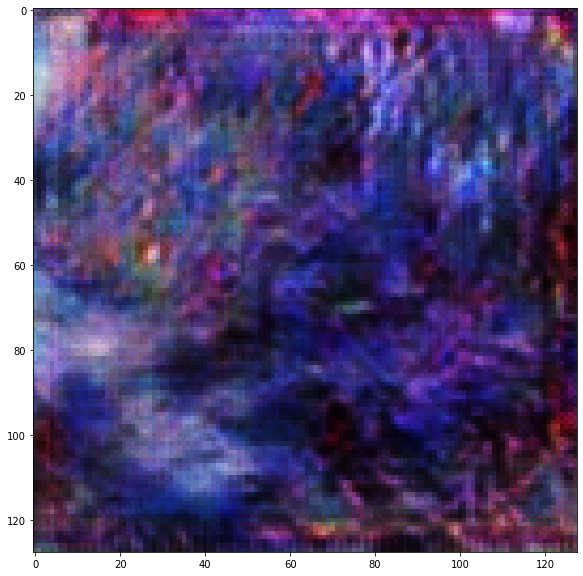

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(unnormalize_image(res[1][13]))

In [45]:
import cv2

In [97]:
img_src = unnormalize_image(res[1][28]).numpy()
img_src = img_src*255
img_src = img_src.astype(np.uint8)

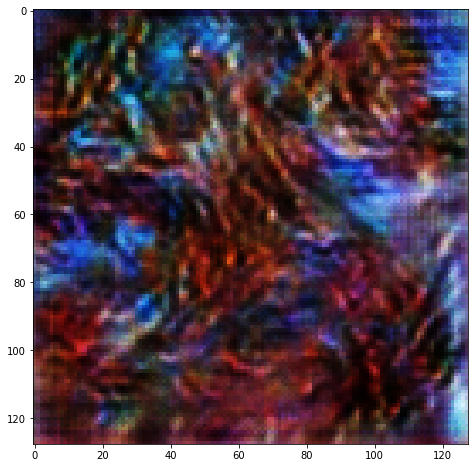

In [98]:
plt.figure(figsize=(8,8))
plt.imshow(img_src)

In [40]:
import cv2

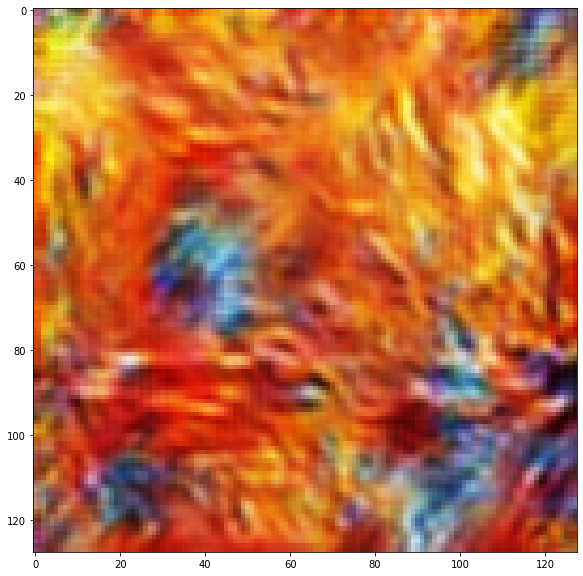

In [55]:
dst = cv2.GaussianBlur(img_src,(3,3),cv2.BORDER_DEFAULT)
dst2 = cv2.GaussianBlur(dst,(3,3),cv2.BORDER_DEFAULT)
dst3 = cv2.addWeighted(dst,1.5,dst2,-0.5,0)
dst4 = cv2.GaussianBlur(dst3,(3,3),cv2.BORDER_DEFAULT)
plt.figure(figsize=(10,10))
final=cv2.addWeighted(dst3,1.5,dst4,-0.5,0)
plt.imshow(final)
imageio.imwrite('gen31.png',final)

In [95]:
ff = imageio.imread('/home/jwelch/Code/menrva/notebooks/gen31_big.2.png')
dst = cv2.GaussianBlur(ff,(755,755),cv2.BORDER_DEFAULT)
dst2 = cv2.GaussianBlur(dst,(755,755),cv2.BORDER_DEFAULT)
dst22 = cv2.GaussianBlur(dst2,(755,755),cv2.BORDER_DEFAULT)
dst2 = cv2.GaussianBlur(dst2,(755,755),cv2.BORDER_DEFAULT)
dst3 = cv2.addWeighted(dst22,1.8,dst2,-0.8,0)
dst3 = cv2.addWeighted(dst3,1.8,dst2,-0.8,0)
dst3 = cv2.addWeighted(dst3,1.8,dst2,-0.8,0)
dst3 = cv2.addWeighted(dst3,1.8,dst2,-0.8,0)

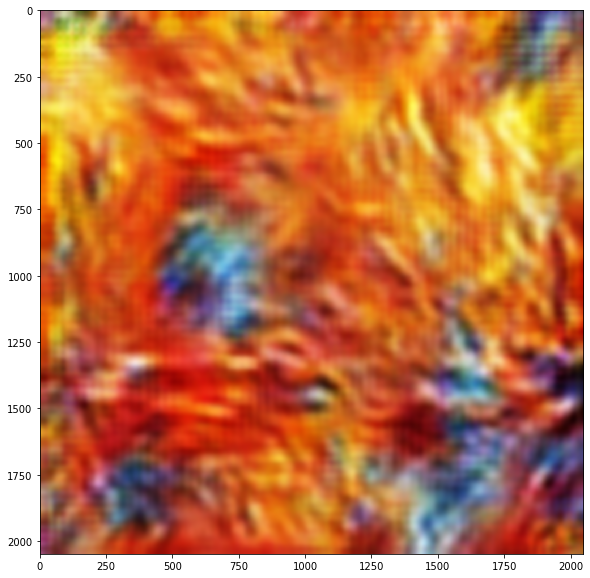

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(dst3)

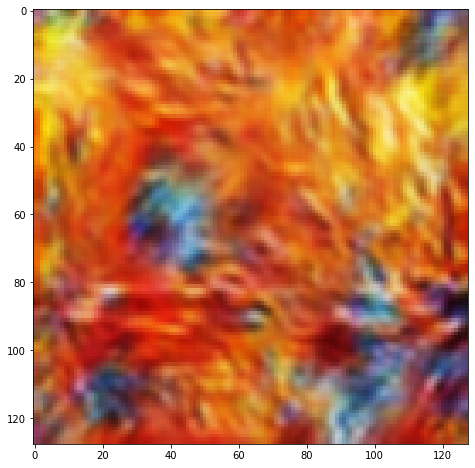

In [42]:
plt.figure(figsize=(8,8))
plt.imshow(dst)

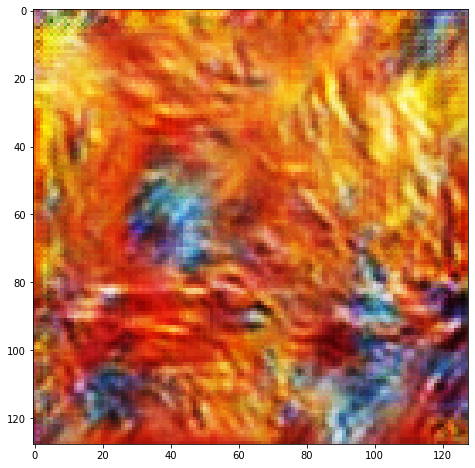

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(unnormalize_image(res[1][31]))


In [73]:
img = unnormalize_image(res[1][13])
img = img*255

In [35]:
import glob

In [25]:
def load_all_images(file):
    res = torch.load(file)
    imgs = []
    for c in range(40):
        imgs.append(unnormalize_image(res[1][c]).unsqueeze(0))
    imgs=torch.cat(imgs,dim=0)
    return einops.rearrange(imgs,'(b1 b2) w h c -> (b1 w) (b2 h) c', b1=4).numpy()

In [14]:
import glob
from matplotlib import animation
import einops

In [15]:
fake_list = list(map(lambda x: x[0],sorted(map(lambda x: (x, os.path.basename(x).split('_')[1], os.path.basename(x).split('_')[2].split('.')[0]),glob.glob('ArtGAN_1/fake_*')),key=lambda x: x[1])))

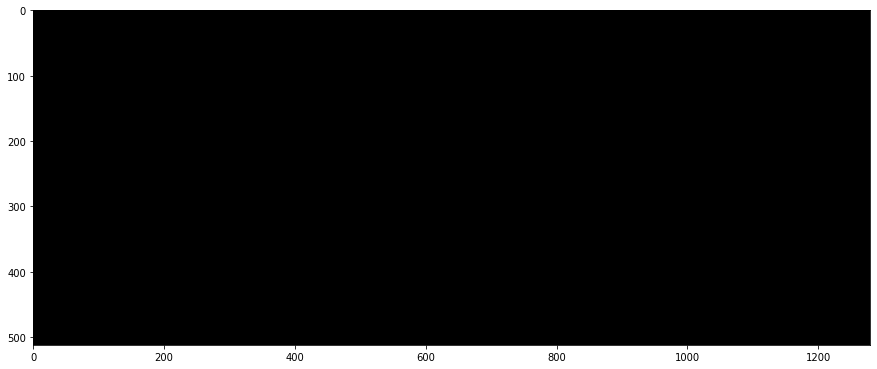

In [19]:
fig = plt.figure(figsize=(15,20))
tt = load_all_images('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/fake_990_61.pkl')
im = plt.imshow(np.zeros_like(tt))
def init():
    im.set_data(np.zeros_like(tt))
    return [im]

def animate(i):
    a = load_all_images(fake_list[i])
    im.set_array(a)
    return [im]

In [20]:
from matplotlib import animation

In [23]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(fake_list),interval=1)

In [ ]:
anim.save('basic_animation.gif', writer = animation.ImageMagickFileWriter())

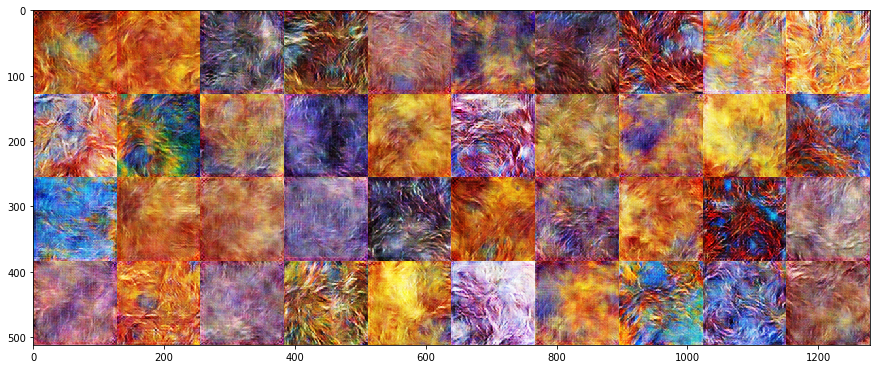

In [103]:
plt.figure(figsize=(15,20))
plt.imshow(load_all_images('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/fake_1890_61.pkl'))

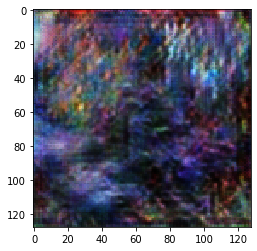

In [74]:
plt.imshow(img.numpy().astype(np.uint8))

In [75]:
imageio.imwrite('gen13.png',img.numpy().astype(np.uint8))

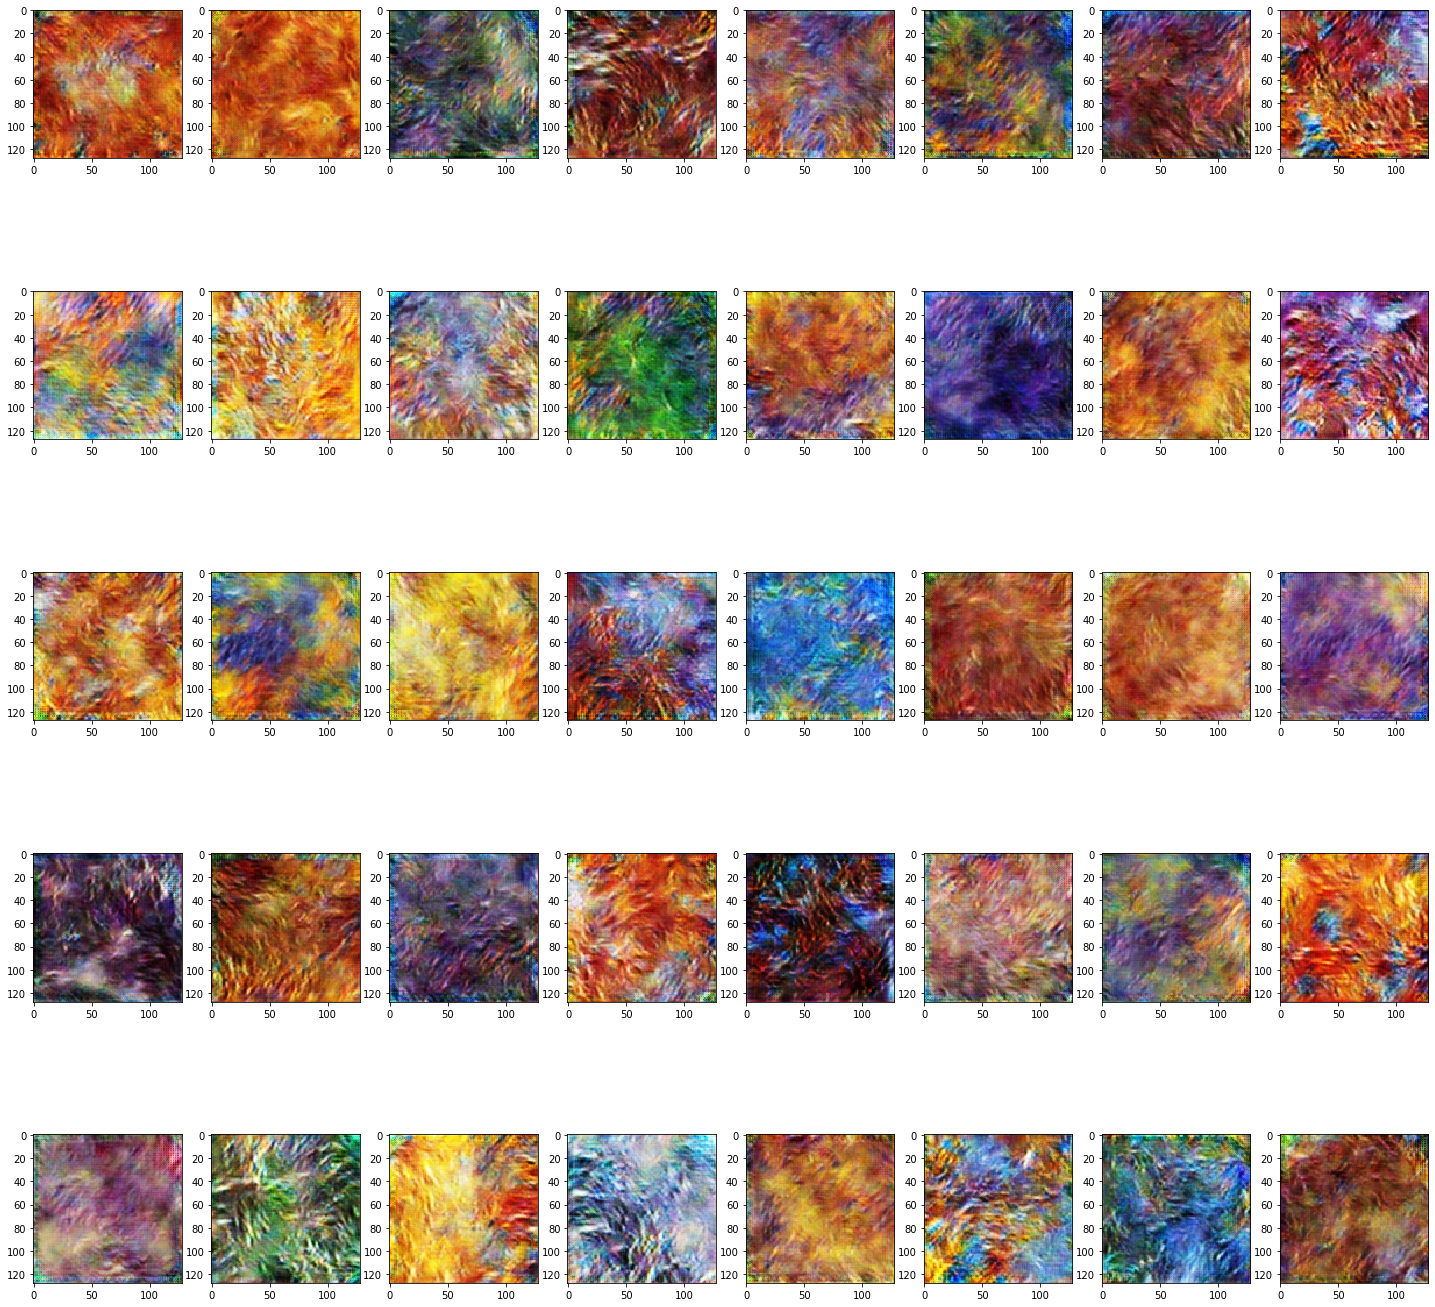

In [34]:
res = torch.load('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/fake_1060_61.pkl')
#plt.figure(figsize=(5,5))
fig, axes = plt.subplots(5,8,figsize=(25,25))
c = 0
for i in range(5):
    for j in range(8):
        axes[i,j].imshow(unnormalize_image(res[1][c]))
        #axes[i,2*j+1].imshow(unnormalize_image(res[1][c]))
        c += 1
    #plt.imshow()
    #plt.imshow(unnormalize_image(res[1][25]))
plt.show()

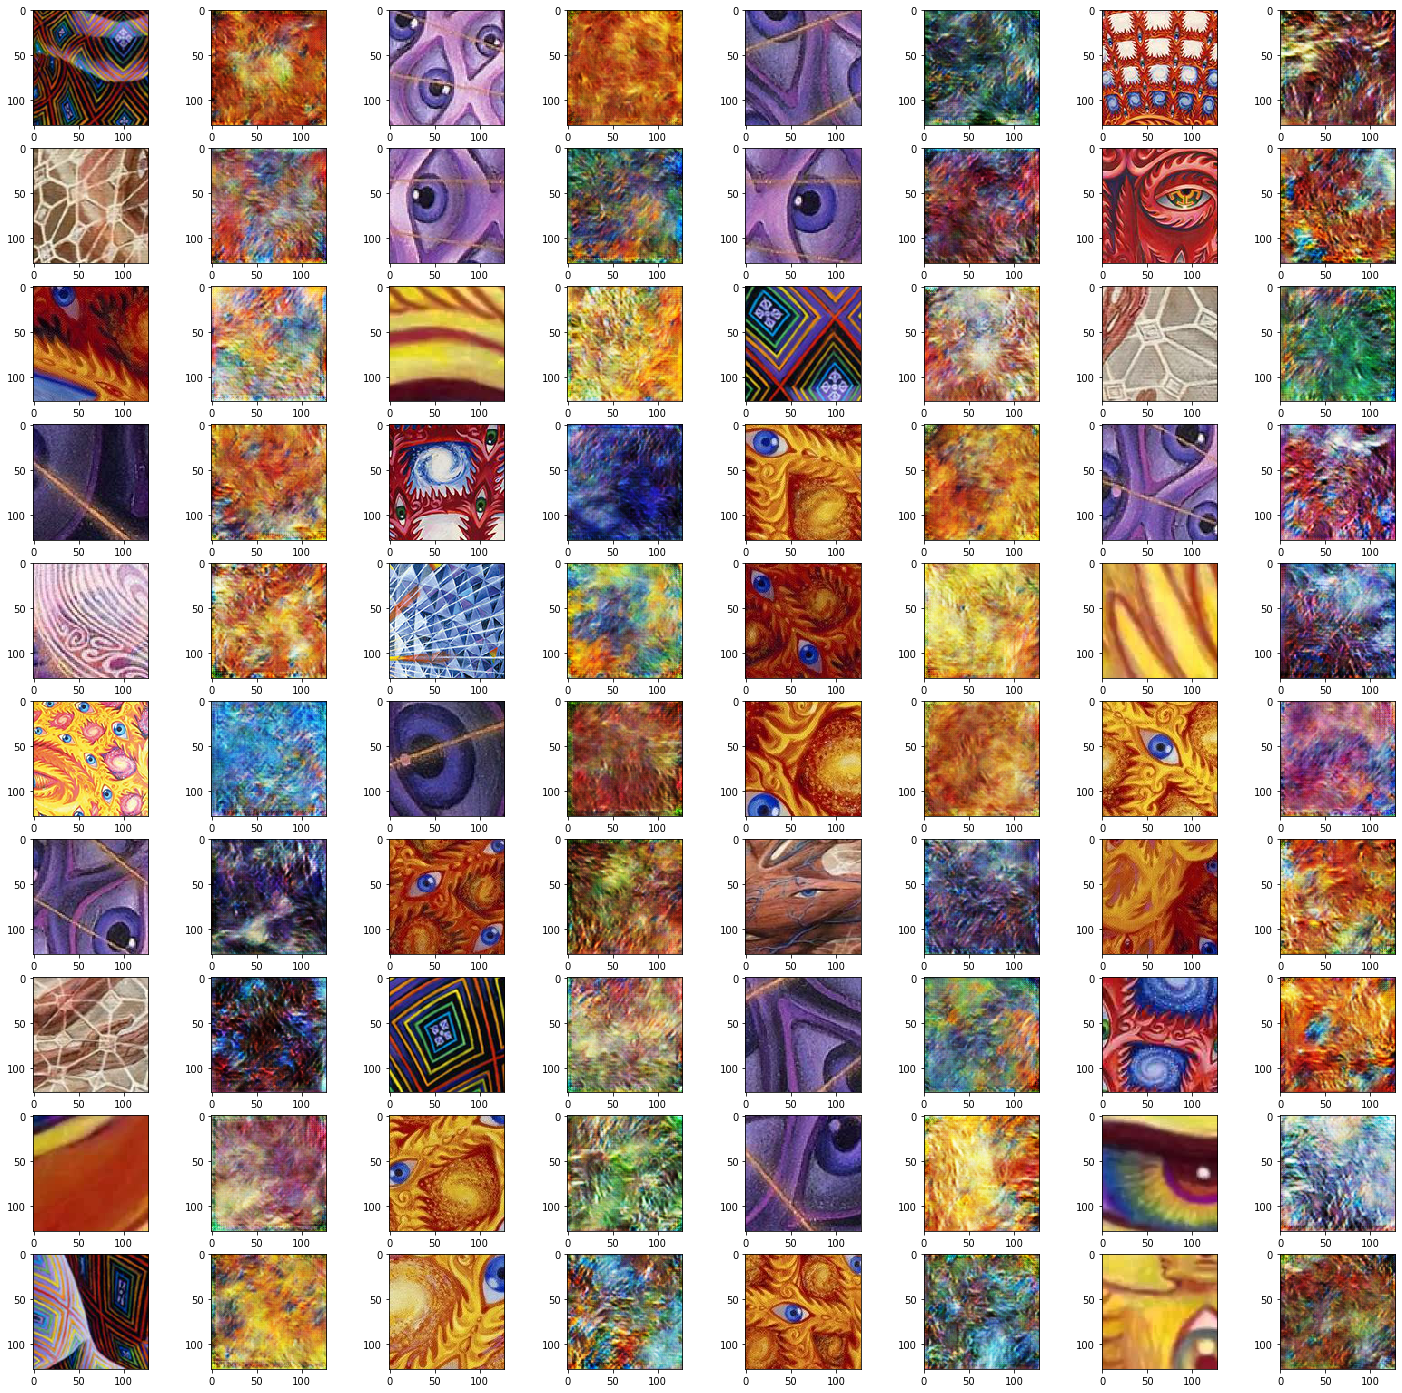

In [31]:
res = torch.load('/home/jwelch/Code/menrva/notebooks/ArtGAN_1/fake_980_61.pkl')
#plt.figure(figsize=(5,5))
fig, axes = plt.subplots(10,8,figsize=(25,25))
c = 0
for i in range(10):
    for j in range(4):
        axes[i,2*j].imshow(unnormalize_image(res[0][c]))
        axes[i,2*j+1].imshow(unnormalize_image(res[1][c]))
        c += 1
    #plt.imshow()
    #plt.imshow(unnormalize_image(res[1][25]))
plt.show()

In [17]:
random.seed(42)
torch.random.manual_seed(42)
np.random.seed(42)

In [4]:
res = ipd.ImagePatchDatabase(patch_width=128,patch_height=128)

In [5]:
loader = torch.utils.data.DataLoader(res,batch_size=25)

In [6]:
config = {
    'lambda_gp':10.0,
    'conv_dim':64,
    'sample_shape': (128,128,3),
    'noise_shape': (100,),
    'opt_type':"rmsprop",
    'lrG':0.0001,
    'lrD':0.0001,
    'weight_decay_G':0.0001,
    'weight_decay_D':0.0001,
    'outdir':'ArtGAN_0',
    'n_epochs':500,
    'n_critic':5,
    'state_update_every':25,
    'save_every':50,
}

In [7]:
solver = ag.PatchGANSolver(loader,config)

In [8]:
fixed_src = []
fixed_noise = []
fixed_src_idx = np.random.choice(range(len(res)),40,replace=False)
for idx in fixed_src_idx:
    fixed_src.append(res[idx].unsqueeze(0))
fixed_src = torch.cat(fixed_src,dim=0)
fixed_noise = [torch.randn((40,100)),torch.randn((40,100))]

In [9]:
solver.fixed_noise = fixed_noise
solver.fixed_src = fixed_src

In [10]:
solver = solver.cuda()

In [12]:
solver.train()

Starting Epoch 0


KeyError: 'state_update_every'